# Notebook for generating jokes

# Exploratory analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
feature_num = 5000

We are only using a small precentage for the analysis to keep it quick.

In [3]:
df = pd.read_json('reddit_jokes.json')

## Preprocessing

In [4]:
df

,body,id,score,title
0,"Now I have to say ""Leroy can you please paint ...",5tz52q,1,I hate how you cant even say black paint anymore
1,Pizza doesn't scream when you put it in the ov...,5tz4dd,0,What's the difference between a Jew in Nazi Ge...
2,...and being there really helped me learn abou...,5tz319,0,I recently went to America....
3,A Sunday school teacher is concerned that his ...,5tz2wj,1,"Brian raises his hand and says, “He’s in Heaven.”"
4,He got caught trying to sell the two books to ...,5tz1pc,0,You hear about the University book store worke...
...,...,...,...,...
194548,Gives me something to read while i'm in the sh...,1a89ts,5,I like a girl with words tattooed on her back.
194549,I mean dyslexia fcuk!!! >_<,1a87we,12,I have sexdaily...
194550,A hockey player showers after three periods.,1a7xnd,44,What's the difference between a hippie chick a...
194551,A father buys a lie detector robot that slaps ...,1a813f,63,new family robot


Dropping the id column, because it's not necessary for the generation

In [5]:
df = df.drop(["id"], axis=1)
print(df.columns)

Index(['body', 'score', 'title'], dtype='object')


## Characters lengths

In [6]:
def plot_character_len(df):
    title_len = df["title"].map(len)
    body_len = df["body"].map(len)
    
    _, ax = plt.subplots(1,2, figsize=(20,5))
    ax[0].hist(title_len, 100, color='crimson')
    ax[0].set_title("Title character length")
    ax[0].set_xlabel("Character length")

    ax[1].hist(body_len, 100, color='dodgerblue')
    ax[1].set_title("Body character length")
    ax[1].set_xlabel("Character length");

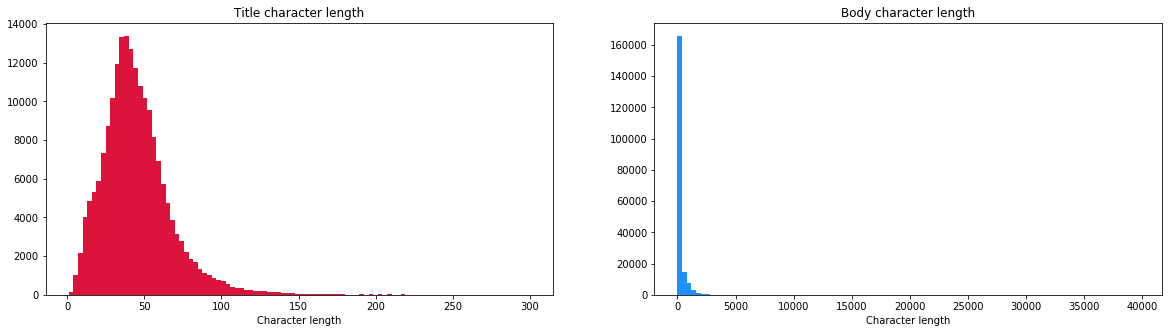

In [7]:
plot_character_len(df)

As we can see, most of the jokes are short, but there are some really long ones in the body. Let's take a look at those.

In [8]:
df["body_len"] = df["body"].str.len()
df.sort_values("body_len", ascending=False, inplace=True)
df

,body,score,title,body_len
13997,"So, there's a man crawling through the desert....",3,Nate the Snake,39728
103362,"So, there's a man crawling through the desert....",24,Lost in the Desert.,39484
144004,"So, there's a man crawling through the desert....",0,Lost in the Desert,39329
107569,"So, there's a man crawling through the desert....",8,I wasted my time on this so I thought I'd wast...,39215
152817,DEVELOPERS DEVELOPERS DEVELOPERS DEVELOPERS DE...,0,DEVELOPERS,39136
...,...,...,...,...
106537,,2,Actual Mechanical Advantage(AMA),0
141605,,0,Paranoia is a government conspiracy.,0
106520,,91,I hope Jessica Biel names her first child Batmo.,0
177735,,12,My Sex Life,0


We have some pretty long jokes, also some of them seems to be in the dataset multiple times. Also there are some empty jokes as well. <br> To solve the problem we will remove all of the jokes that are longer than 1000 or shorter than 1. 

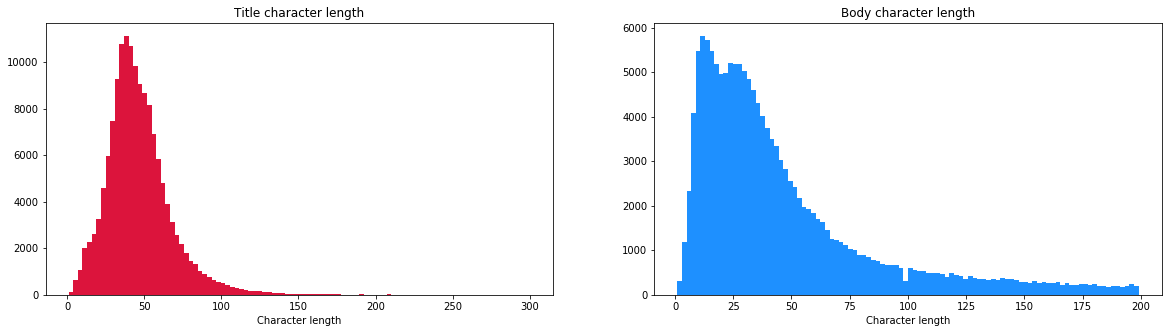

In [9]:
df = df[(df["body_len"] < 200) & (df["body_len"] > 0)]
plot_character_len(df)

In [10]:
df

,body,score,title,body_len
59358,"He looks around, panic in his eyes, and sees t...",13,A man wakes up in a hospital after being in a ...,199
175469,"...Looking down at his supper he asks, ""Are yo...",1,Man walks back into a fish n' chip shop...,199
78979,There are some horrible bastards about\nI hear...,0,There are some horrible bastards about,199
109895,"Immediately when he gets inside, he begins to ...",25,A blind man walks into a bar with a seeing eye...,199
188599,...can be the only stairs. You will not see ou...,0,Escalators can never rest...,199
...,...,...,...,...
164802,,0,How do you keep a Redditor in suspense?,1
162165,,5,There's a thin line between word and world.,1
193482,B,23,What do you call bears with no ears?,1
176434,,60,I will not sleep until I find a cure for my in...,1


## Tokenize jokes

In [11]:
import nltk

I will change the words to lower case and tokenize them, to gain some more insight.

In [12]:
body_token = df["body"][:feature_num].map(lambda x: x.lower()).map(nltk.word_tokenize)
title_token = df["title"][:feature_num].map(lambda x: x.lower()).map(nltk.word_tokenize)

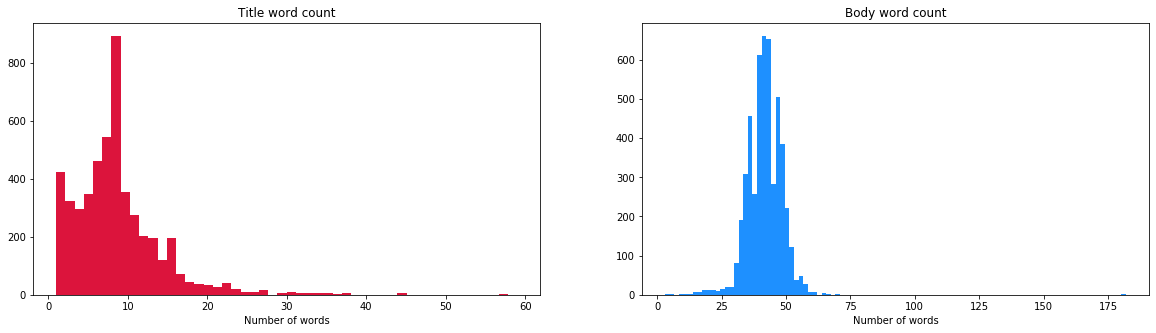

In [13]:
body_word_len = body_token.map(len)
title_word_len = title_token.map(len)

_, ax = plt.subplots(1,2, figsize=(20,5))
ax[0].hist(title_word_len, 50, color='crimson')
ax[0].set_title("Title word count")
ax[0].set_xlabel("Number of words")

ax[1].hist(body_word_len, 100, color='dodgerblue')
ax[1].set_title("Body word count")
ax[1].set_xlabel("Number of words");

This shows us that while the titles tend to be just a few words long the bodies are much more diversified.

In [14]:
body_all_words = [word for token in body_token.values for word in token]
title_all_words = [word for token in title_token.values for word in token]

In [15]:
from collections import Counter
body_all_words_counter = Counter(body_all_words)
title_all_words_counter = Counter(title_all_words)

In [16]:
body_all_words_counter.most_common(10)

[('.', 9117),
 (',', 8155),
 ('the', 7918),
 ("''", 5851),
 ('a', 5524),
 ('i', 5331),
 ('``', 5145),
 ('and', 3749),
 ('to', 3685),
 ('you', 3443)]

In [17]:
title_all_words_counter.most_common(10)

[('a', 3122),
 ('the', 1445),
 ('...', 1078),
 ('.', 1027),
 ('to', 877),
 ('i', 742),
 ('and', 679),
 ('?', 664),
 ('in', 585),
 (',', 573)]

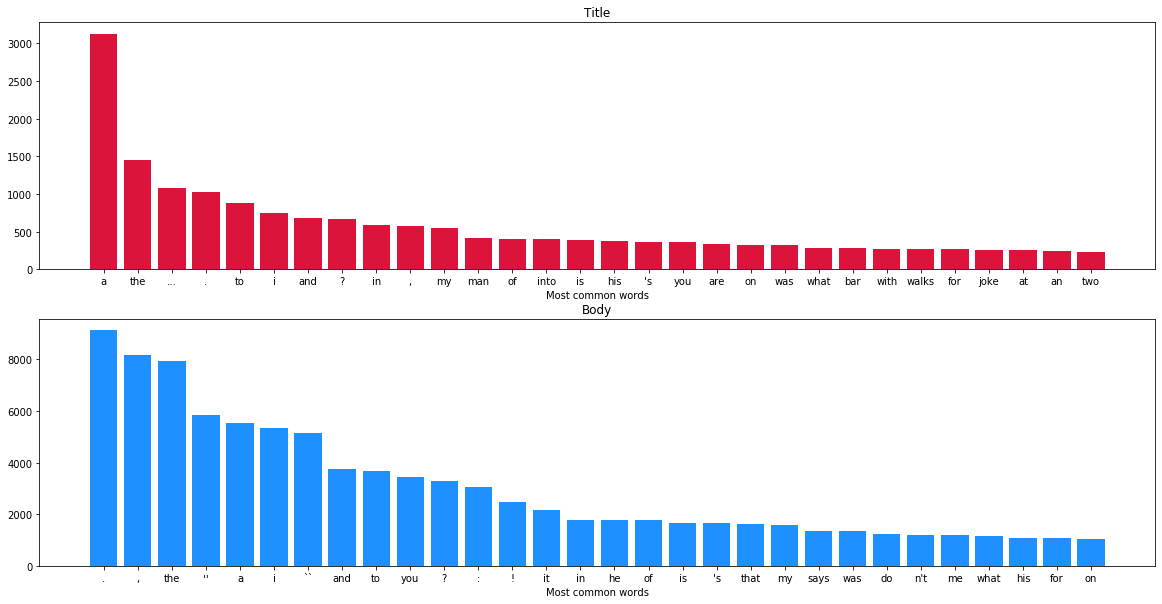

In [18]:
def plot_word_freq(title_counter, body_counter):
    x_t, y_t = zip(*title_counter.most_common(30))    
    x_b, y_b = zip(*body_counter.most_common(30))
    _, ax = plt.subplots(2,1, figsize=(20,10))
    ax[0].bar(x_t, y_t, color='crimson')
    ax[0].set_title("Title")
    ax[0].set_xlabel("Most common words")

    ax[1].bar(x_b, y_b, color='dodgerblue')
    ax[1].set_title("Body")
    ax[1].set_xlabel("Most common words");
plot_word_freq(title_all_words_counter, body_all_words_counter)

We see some strange words that appear often. To make our data cleaner we will filter them out.

In [19]:
body_filtered = [word for word in body_all_words if word.isalpha() or word in ["!", "?", "."]]
body_filtered_counter = Counter(body_filtered)
title_filtered = [word for word in title_all_words if word.isalpha() or word in ["!", "?", "."]]
title_filtered_counter = Counter(title_filtered)

We are keeping the endings, because they store information about the context.

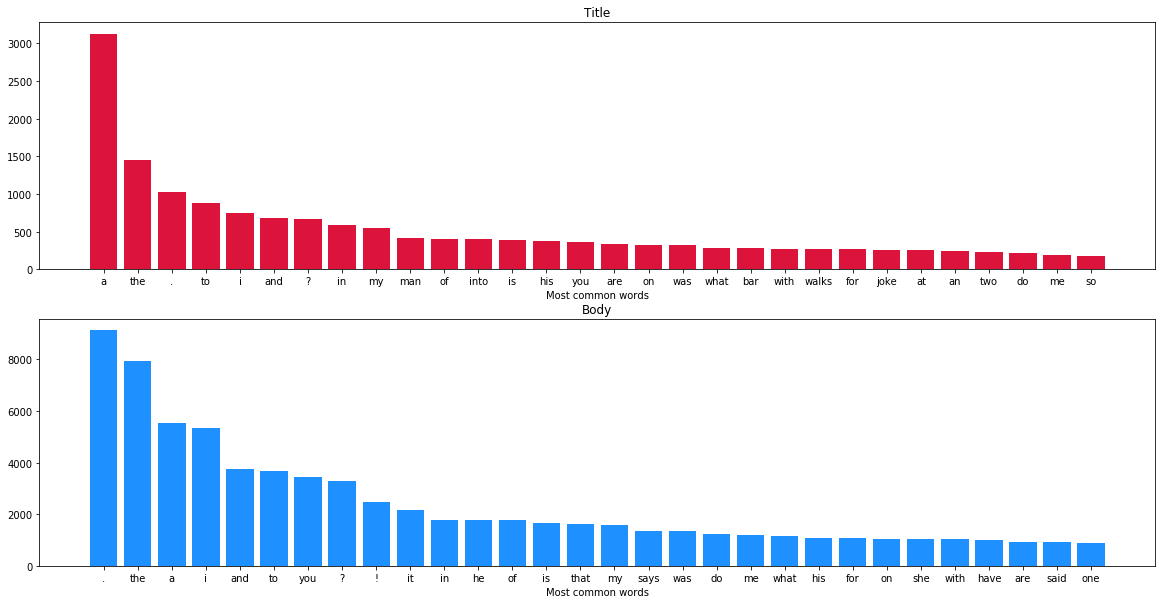

In [20]:
plot_word_freq(title_filtered_counter, body_filtered_counter)

Looks better

# Generating text
Let's try to generate the body of a joke

In [21]:
trigrams = nltk.trigrams(body_filtered)
trigrams = (((w1, w2), w3) for w1, w2, w3 in trigrams)
cond_pd = nltk.ConditionalProbDist(nltk.ConditionalFreqDist(trigrams), nltk.MLEProbDist)

In [22]:
len(body_filtered)

174286

In [23]:
def generate_text(cond_pd, start, length):
    word1, word2 = start
    text = [word1]
    for i in range(length):
        text.append(word2)
        try:
            word = cond_pd[(word1, word2)].generate()
        except:
            print('The pair {} is not among the conditions of our model, stopping'.format((word1, word2)))
            break
        word1 = word2
        word2 = word
    return text

In [24]:
generate_text(cond_pd, ('once', 'was'), 8)

['once', 'was', 'a', 'necromancer', '.', 'nbsp', 'nbsp', 'nbsp', 'nbsp']

# Adding a special character to represent the end
To generate text without specifying the length we need to know when the text ends, to do this we will add "\END" to the end of all of the texts

In [25]:
body_token_with_end = body_token.map(lambda x: x + ["\END"])

In [26]:
body_all_words_with_end = [word for token in body_token_with_end.values for word in token]
body_with_end_filtered = [word for word in body_all_words_with_end if word.isalpha() or word in ["!", "?", ".", "\END"]]
trigrams = nltk.trigrams(body_with_end_filtered)
trigrams = (((w1, w2), w3) for w1, w2, w3 in trigrams)
cond_pd = nltk.ConditionalProbDist(nltk.ConditionalFreqDist(trigrams), nltk.MLEProbDist)

Let's update our generating function

In [27]:
def generate_text(cond_pd, start, length):
    word1, word2 = start
    text = [word1]
    i = 0
    while(i < length or length == -1):
        text.append(word2)
        try:
            word = cond_pd[(word1, word2)].generate()
        except:
            print('The pair {} is not among the conditions of our model, stopping'.format((word1, word2)))
            break
        if word == "\END":
            break
        elif i > 10000:
            print("Stopping: Word count is over a 1000")
            break
        word1 = word2
        word2 = word 
        i += 1
    return text

In [28]:
text = generate_text(cond_pd, ('once', 'was'), -1)
print(text)

['once', 'was', 'a', 'method', 'actor', 'and', 'he', 'still']


# Predicting the score of a joke
The dataset contains scores for the jokes, so let's try to create a model that can predict it.

In [29]:
df = df.drop(["body_len"], axis=1)

We won't need the body_len column anymore. <br> Also, let's join the title and body so we have one text for the joke.

In [30]:
df["joke"] = (df["title"] + " " + df["body"]).map(lambda x: x.lower())
df = df.drop(["title", "body"], axis=1)
df

,score,joke
59358,13,a man wakes up in a hospital after being in a ...
175469,1,man walks back into a fish n' chip shop... ......
78979,0,there are some horrible bastards about there a...
109895,25,a blind man walks into a bar with a seeing eye...
188599,0,escalators can never rest... ...can be the onl...
...,...,...
164802,0,how do you keep a redditor in suspense?
162165,5,there's a thin line between word and world.
193482,23,what do you call bears with no ears? b
176434,60,i will not sleep until i find a cure for my in...


In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

Our model will only understand numbers, so we need to convert the text.

In [32]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=feature_num)
bows = tfidf_vectorizer.fit_transform(df["joke"])
bows

<148969x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2004357 stored elements in Compressed Sparse Row format>

Right now we have a lot of different scores for the texts. While we could build a regression model on this, when I tried with some basic models (SVR, SGD) it didn't perform well, so I'm going to transform the scores into fewer classes and use classfification.

In [33]:
len(df["score"].unique())

2635

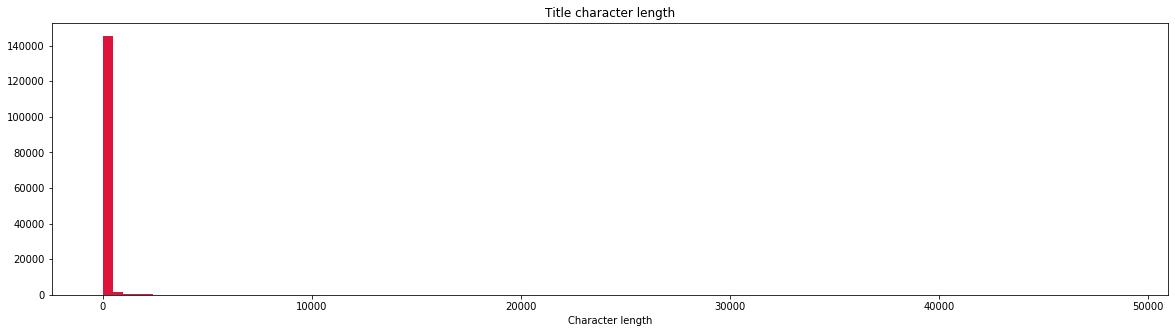

In [34]:
_, ax = plt.subplots(1,1, figsize=(20,5))
ax.hist(df["score"], 100, color='crimson')
ax.set_title("Title character length")
ax.set_xlabel("Character length");

This histogram tells us that most scoes are small. <br> Let's take this into account when transforming the scores.

In [35]:
def score_transform(x):
    if x < 5000:
        return int(x / 100)
    elif x < 20000:
        return -1
    else:
        return -2        

In [36]:
score_transformed = df["score"].map(lambda x: score_transform(x) + 2) # we add 2 so our smallest value will be 0
len(score_transformed.unique())

52

This means that we have 52 classes
## Split the data into train and test set

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bows, score_transformed, test_size=0.2, random_state=42, shuffle=True)

In [38]:
X_train.shape, len(y_train), X_test.shape, len(y_test)

((119175, 5000), 119175, (29794, 5000), 29794)

Reducing the amount of data for quicker training

In [39]:
X_train = X_train[:10000]
y_train = y_train[:10000]
X_test = X_test[:10000]
y_test = y_test[:10000]

In [40]:
X_train.shape, len(y_train), X_test.shape, len(y_test)

((10000, 5000), 10000, (10000, 5000), 10000)

## Support vector machine

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, ShuffleSplit, RandomizedSearchCV
from sklearn import svm
svc = svm.LinearSVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9244

## Randomized search

In [42]:
param_grid = {'C': [0.01, 0.02, 0.03, 0.1, 1, 10], 'loss': ['hinge', 'squared_hinge']}

In [43]:
svc = svm.LinearSVC()
random_search = RandomizedSearchCV(svc, param_grid, n_iter=10, n_jobs=-1, return_train_score=False)
random_search.fit(X_train, y_train)

/home/kevin/miniconda3/envs/dataS/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


RandomizedSearchCV(estimator=LinearSVC(), n_jobs=-1,
                   param_distributions={'C': [0.01, 0.02, 0.03, 0.1, 1, 10],
                                        'loss': ['hinge', 'squared_hinge']})

In [44]:
pd.DataFrame(random_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_loss,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.475433,0.020505,0.004848,0.000296,squared_hinge,0.1,"{'loss': 'squared_hinge', 'C': 0.1}",0.9305,0.9305,0.9305,0.9305,0.9310,0.9306,0.000200,1
1,0.539851,0.015803,0.003671,0.000405,squared_hinge,1,"{'loss': 'squared_hinge', 'C': 1}",0.9295,0.9300,0.9300,0.9295,0.9310,0.9300,0.000548,9
2,0.717089,0.032702,0.003613,0.000130,hinge,0.02,"{'loss': 'hinge', 'C': 0.02}",0.9305,0.9305,0.9305,0.9305,0.9310,0.9306,0.000200,1
3,0.628273,0.026235,0.003479,0.000182,hinge,0.01,"{'loss': 'hinge', 'C': 0.01}",0.9305,0.9305,0.9305,0.9305,0.9310,0.9306,0.000200,1
4,0.539912,0.014484,0.003520,0.000063,squared_hinge,0.02,"{'loss': 'squared_hinge', 'C': 0.02}",0.9305,0.9305,0.9305,0.9305,0.9310,0.9306,0.000200,1
5,0.838084,0.085973,0.003669,0.000238,hinge,0.1,"{'loss': 'hinge', 'C': 0.1}",0.9305,0.9305,0.9305,0.9305,0.9310,0.9306,0.000200,1
6,0.536070,0.012056,0.003779,0.000166,squared_hinge,0.03,"{'loss': 'squared_hinge', 'C': 0.03}",0.9305,0.9305,0.9305,0.9305,0.9310,0.9306,0.000200,1
7,0.549881,0.015583,0.003529,0.000146,squared_hinge,0.01,"{'loss': 'squared_hinge', 'C': 0.01}",0.9305,0.9305,0.9305,0.9305,0.9310,0.9306,0.000200,1
8,0.757817,0.016652,0.003536,0.000135,hinge,0.03,"{'loss': 'hinge', 'C': 0.03}",0.9305,0.9305,0.9305,0.9305,0.9310,0.9306,0.000200,1
9,1.042975,0.067158,0.002706,0.000363,hinge,10,"{'loss': 'hinge', 'C': 10}",0.9045,0.9050,0.9095,0.9020,0.9055,0.9053,0.002421,10


Seems like the best parameters are 0.01 with hinge loss

In [45]:
svc = svm.LinearSVC(loss="hinge", C=0.01)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)
print("svc accuracy: ",svc.score(X_test, y_test))

svc accuracy:  0.9255


## Logistic regression

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
print("lr accuracy: ",lr.score(X_test,y_test))

lr accuracy:  0.9255


This gives similar results to the svm

## Now let's see how many points our generated jokes would get
First we need to update our generator to generate full jokes (now it only generates the body)

In [47]:
full_token = (df["joke"][:feature_num].map(nltk.word_tokenize)).map(lambda x: x + ["\END"])
full_all_words = [word for token in full_token.values for word in token]
full_all_words_filtered = [word for word in full_all_words if word.isalpha() or word in ["!", "?", ".", "\END"]]
trigrams = nltk.trigrams(full_all_words_filtered)
trigrams = (((w1, w2), w3) for w1, w2, w3 in trigrams)
cond_pd = nltk.ConditionalProbDist(nltk.ConditionalFreqDist(trigrams), nltk.MLEProbDist)

In [48]:
def generate_jokes(first, second, num=3):
    jokes = []
    for i in range(num):
        text = ' '.join(generate_text(cond_pd, (first, second), -1))
        jokes.append(text)
    return jokes

In [49]:
some_jokes = generate_jokes("once", "was")
some_jokes

['once was a muslim man were not the first time doc ? the waitress had a dog walks into a bar the bartender says it getting wetter and wetter . i asked him which site he used to wake up the lynard skynard ! ! ! ! ! what should you at ? the wise old indian chief replies my penis moan',
 'once was a website called reddit there once was a blast ! im no chemist . this was actually the subject line of spots from my childhood event and this dog came running over and punched him straight in the river . pete fell in who was that all the difference between instant and real coffee is and it was his duty . what do eskimos and tupperware have in common ? i said you are not a pig and a black guy then quickly stabs her and says in that starbucks anymore . america is the lock and in front of a forest for a place to blend in . she said oh well no more food the only malaysian airlines flight and now cameras everywhere',
 'once was a woman goes to see who can get closer and closer but will look like ? a

In [50]:
jokes_test = tfidf_vectorizer.transform(some_jokes)

In [51]:
svc.predict(jokes_test)

array([2, 2, 2])

The worst jokes are put into class 2

In [52]:
i = 0
bad_joke = True
while(i < 1000):
    some_jokes = generate_jokes("once", "was")
    jokes_test = tfidf_vectorizer.transform(some_jokes)
    results = svc.predict(jokes_test)
    bad_joke = max(results) == 2
    if(not bad_joke):
        print("Found a good one\n")
        for j in some_jokes:
            print(j + "\n\n")
        print(results)
        break
    i += 1
if i >= 1000:
    print("No good jokes found")

No good jokes found


Well, seems like our generator won't make the best jokes for now.